In [6]:
import numpy as np
import pandas as pd

import hdbscan
from sklearn.manifold import TSNE

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [7]:
distance_matrix_file = '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-24T21:04:51.344795/distances.csv'
df = pd.read_csv(distance_matrix_file, sep=',', header=None)
distance_matrix = df.values

In [19]:
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
print("Clusters:", len(np.unique(clusterer.labels_))-1)

Clusters: 7


In [9]:
embedding = TSNE(n_components=2, metric='precomputed').fit_transform(distance_matrix)

<IPython.core.display.Javascript object>


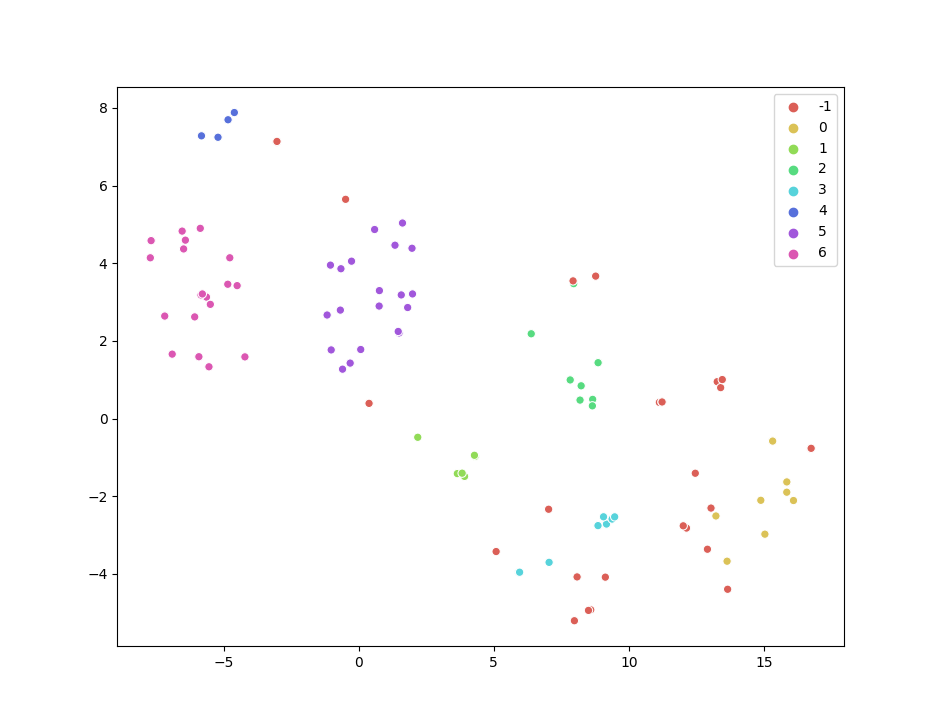

In [18]:
sns.scatterplot(
    x=embedding[:,0],
    y=embedding[:,1],
    hue=clusterer.labels_,
    palette=sns.color_palette("hls", len(np.unique(clusterer.labels_))),
    data=df
)